In [1]:
import opendatasets as od
import os
from zipfile import ZipFile

import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt

In [3]:
dataset_url = 'https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting'
od.download('https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rokadesuraj
Your Kaggle Key: ········


100%|██████████████████████████████████████████████████████████████████████████████| 2.70M/2.70M [00:14<00:00, 201kB/s]


Extracting archive .\walmart-recruiting-store-sales-forecasting/walmart-recruiting-store-sales-forecasting.zip to .\walmart-recruiting-store-sales-forecasting


In [2]:
dataset_url = 'https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting'
od.download('https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting')

Skipping, found downloaded files in ".\walmart-recruiting-store-sales-forecasting" (use force=True to force download)


In [3]:
os.listdir('.\walmart-recruiting-store-sales-forecasting')

['features.csv.zip',
 'sampleSubmission.csv.zip',
 'stores.csv',
 'test.csv.zip',
 'train.csv.zip']

In [4]:
train_zip_file = ZipFile('walmart-recruiting-store-sales-forecasting/train.csv.zip')
features_zip_file = ZipFile('walmart-recruiting-store-sales-forecasting/features.csv.zip')
test_zip_file = ZipFile('walmart-recruiting-store-sales-forecasting/test.csv.zip')
sample_submission_zip_file = ZipFile('walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip')

In [5]:
train_df = pd.read_csv(train_zip_file.open('train.csv'))
features_df = pd.read_csv(features_zip_file.open('features.csv'))
stores_df = pd.read_csv('walmart-recruiting-store-sales-forecasting/stores.csv')
test_df = pd.read_csv(test_zip_file.open('test.csv'))
submission_df = pd.read_csv(sample_submission_zip_file.open('sampleSubmission.csv'))

In [6]:
dataset = train_df.merge(stores_df, how='left').merge(features_df, how='left')
test_dataset = test_df.merge(stores_df, how='left').merge(features_df, how='left')

In [7]:
dataset

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [8]:
dataset.describe(include='all')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570,421570.000000,421570,421570,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
unique,NaN,NaN,143,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2011-12-23,NaN,False,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3027,NaN,391909,215478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,22.200546,44.260317,NaN,15981.258123,NaN,NaN,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,NaN,22711.183519,NaN,NaN,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,NaN,-4988.940000,NaN,NaN,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,NaN,2079.650000,NaN,NaN,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,NaN,7612.030000,NaN,NaN,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,NaN,20205.852500,NaN,NaN,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000


In [9]:
dataset.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


# Null Values

In [11]:
dataset.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

# Correlation with the output feature Weekly_Sales

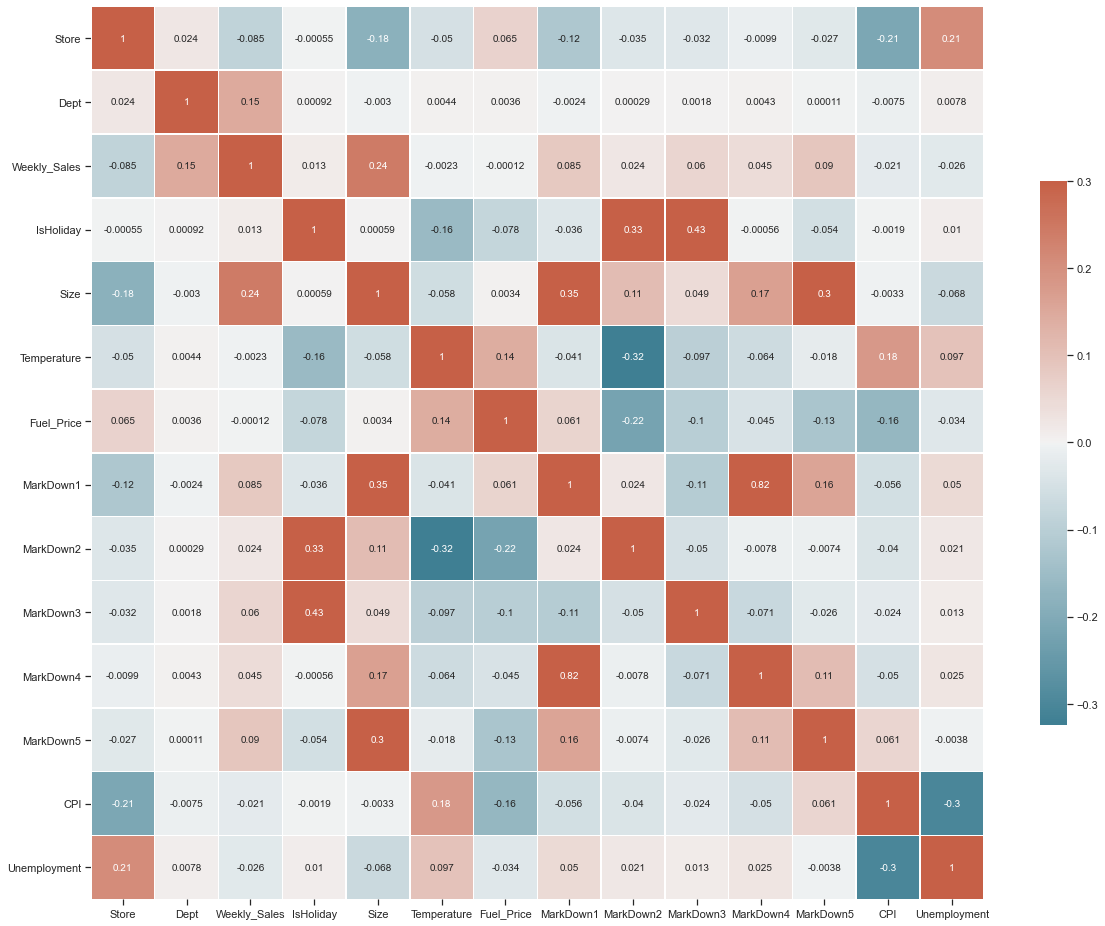

In [12]:
corr=dataset.corr()
f,ax=plt.subplots(figsize=(20,20))
cmap=sns.diverging_palette(220,20,as_cmap=True)
sns.heatmap(corr,cmap=cmap,vmax=.3,center=0,annot=True,square=True,linewidths=.5,cbar_kws={'shrink':.5})
plt.show()

In Correlation matrix we clearly understand Store,Dept and Size have strong correlation with Weekly_Sales

# Find the Outliers using Box Plot

<AxesSubplot:xlabel='Store'>

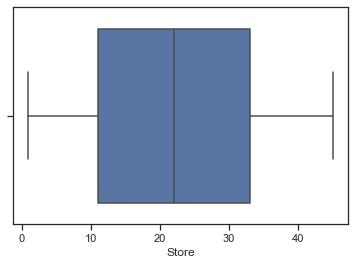

In [25]:
sns.boxplot(x=dataset['Store'])

There are no outliers in Store


<AxesSubplot:xlabel='Dept'>

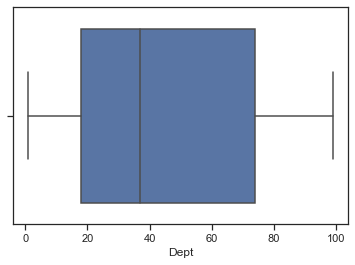

In [26]:
sns.boxplot(x=dataset['Dept'])

There are no outliers in Dept

<AxesSubplot:xlabel='Size'>

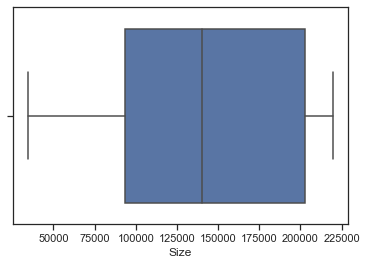

In [27]:
sns.boxplot(x=dataset['Size'])

There are no outlier in Size

# Data Manipulation

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [14]:
#fill th null values
dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
#Create Year Columns
dataset['Year'] = pd.to_datetime(dataset['Date']).dt.year
#Create Month Columns
dataset['Month'] = pd.to_datetime(dataset['Date']).dt.month
#Create Week Columns
dataset['Week'] = pd.to_datetime(dataset['Date']).dt.week

#Delete those columns that have less correlation
dataset = dataset.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment', 'Temperature'])

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [15]:
df=dataset.pop('Weekly_Sales')
dataset['Weekly_Sales']=df

In [16]:
df

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [17]:
dataset

,Store,Dept,IsHoliday,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Year,Month,Week,Weekly_Sales
0,1,1,False,A,151315,0.00,0.00,0.00,0.00,0.00,2010,2,5,24924.50
1,1,1,True,A,151315,0.00,0.00,0.00,0.00,0.00,2010,2,6,46039.49
2,1,1,False,A,151315,0.00,0.00,0.00,0.00,0.00,2010,2,7,41595.55
3,1,1,False,A,151315,0.00,0.00,0.00,0.00,0.00,2010,2,8,19403.54
4,1,1,False,A,151315,0.00,0.00,0.00,0.00,0.00,2010,3,9,21827.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,False,B,118221,4556.61,20.64,1.50,1601.01,3288.25,2012,9,39,508.37
421566,45,98,False,B,118221,5046.74,0.00,18.82,2253.43,2340.01,2012,10,40,628.10
421567,45,98,False,B,118221,1956.28,0.00,7.89,599.32,3990.54,2012,10,41,1061.02
421568,45,98,False,B,118221,2004.02,0.00,3.18,437.73,1537.49,2012,10,42,760.01


In [18]:
input_cols,target_col=dataset.columns[:-1],dataset.columns[-1]
inputs_df,targets=dataset[input_cols].copy(),dataset[target_col].copy()

# Numeric and Categorical Columns

In [19]:
numeric_cols = dataset[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = dataset[input_cols].select_dtypes(include='object').columns.tolist()

In [20]:
numeric_cols

['Store',
 'Dept',
 'Size',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'Year',
 'Month',
 'Week']

In [21]:
categorical_cols

['Type']

In [22]:
# Display the Numerical Column
dataset[numeric_cols]

,Store,Dept,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Year,Month,Week
0,1,1,151315,0.00,0.00,0.00,0.00,0.00,2010,2,5
1,1,1,151315,0.00,0.00,0.00,0.00,0.00,2010,2,6
2,1,1,151315,0.00,0.00,0.00,0.00,0.00,2010,2,7
3,1,1,151315,0.00,0.00,0.00,0.00,0.00,2010,2,8
4,1,1,151315,0.00,0.00,0.00,0.00,0.00,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,118221,4556.61,20.64,1.50,1601.01,3288.25,2012,9,39
421566,45,98,118221,5046.74,0.00,18.82,2253.43,2340.01,2012,10,40
421567,45,98,118221,1956.28,0.00,7.89,599.32,3990.54,2012,10,41
421568,45,98,118221,2004.02,0.00,3.18,437.73,1537.49,2012,10,42


In [23]:
#Categorical Column
dataset[categorical_cols]

,Type
0,A
1,A
2,A
3,A
4,A
...,...
421565,B
421566,B
421567,B
421568,B


Fill and Scale numeric columns


In [31]:
#our model is predictive model so for handling the misssing values we going to us simpleimputer
imputer=SimpleImputer().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols]=imputer.transform(inputs_df[numeric_cols])
scaler=MinMaxScaler().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols]=scaler.transform(inputs_df[numeric_cols])

In [32]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

In [39]:
encoded_cols

['Type_A', 'Type_B', 'Type_C']

In [40]:
inputs_df

,Store,Dept,IsHoliday,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Year,Month,Week,Type_A,Type_B,Type_C
0,0.0,0.000000,False,A,0.630267,0.000000,0.002536,0.000205,0.000000,0.000000,0.0,0.090909,0.078431,1.0,0.0,0.0
1,0.0,0.000000,True,A,0.630267,0.000000,0.002536,0.000205,0.000000,0.000000,0.0,0.090909,0.098039,1.0,0.0,0.0
2,0.0,0.000000,False,A,0.630267,0.000000,0.002536,0.000205,0.000000,0.000000,0.0,0.090909,0.117647,1.0,0.0,0.0
3,0.0,0.000000,False,A,0.630267,0.000000,0.002536,0.000205,0.000000,0.000000,0.0,0.090909,0.137255,1.0,0.0,0.0
4,0.0,0.000000,False,A,0.630267,0.000000,0.002536,0.000205,0.000000,0.000000,0.0,0.181818,0.156863,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,1.0,0.989796,False,B,0.451136,0.051402,0.002733,0.000216,0.023728,0.030301,1.0,0.727273,0.745098,0.0,1.0,0.0
421566,1.0,0.989796,False,B,0.451136,0.056931,0.002536,0.000338,0.033397,0.021563,1.0,0.818182,0.764706,0.0,1.0,0.0
421567,1.0,0.989796,False,B,0.451136,0.022068,0.002536,0.000261,0.008882,0.036773,1.0,0.818182,0.784314,0.0,1.0,0.0
421568,1.0,0.989796,False,B,0.451136,0.022607,0.002536,0.000228,0.006487,0.014168,1.0,0.818182,0.803922,0.0,1.0,0.0


# Split DataSer in Train Test 

In [41]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df[numeric_cols + encoded_cols], targets, test_size=0.25, random_state=42)

In [42]:
train_inputs

,Store,Dept,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Year,Month,Week,Type_A,Type_B,Type_C
150504,0.340909,0.183673,0.120825,0.005471,0.002538,0.003563,0.000240,0.008854,0.5,1.000000,0.980392,0.0,1.0,0.0
216043,0.477273,0.928571,0.458367,0.000000,0.002536,0.000205,0.000000,0.000000,0.5,0.454545,0.411765,0.0,1.0,0.0
295382,0.681818,0.112245,0.914088,0.191174,0.038701,0.000793,0.165807,0.076634,1.0,0.090909,0.098039,1.0,0.0,0.0
279744,0.636364,0.204082,0.318073,0.000000,0.002536,0.000205,0.000000,0.000000,0.0,0.545455,0.490196,0.0,1.0,0.0
377848,0.886364,0.591837,0.650663,0.000000,0.002536,0.000205,0.000000,0.000000,0.5,0.272727,0.313725,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0.590909,0.173469,0.916437,0.029773,0.002536,0.000239,0.008529,0.029002,1.0,0.818182,0.803922,1.0,0.0,0.0
365838,0.863636,0.357143,0.807775,0.000000,0.002536,0.000205,0.000000,0.000000,0.0,0.363636,0.372549,1.0,0.0,0.0
131932,0.295455,0.285714,0.898651,0.000000,0.002536,0.000205,0.000000,0.000000,0.0,0.272727,0.313725,1.0,0.0,0.0
146867,0.318182,0.908163,0.480993,0.000000,0.002536,0.000205,0.000000,0.000000,0.5,0.545455,0.490196,0.0,1.0,0.0


In [43]:
val_inputs

,Store,Dept,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Year,Month,Week,Type_A,Type_B,Type_C
272342,0.613636,0.397959,0.927901,0.058162,0.189104,0.001746,0.009437,0.048088,1.0,0.000000,0.000000,1.0,0.0,0.0
176581,0.386364,0.938776,0.464300,0.083592,0.006050,0.000385,0.027453,0.021490,1.0,0.181818,0.176471,0.0,1.0,0.0
354212,0.840909,0.030612,0.026063,0.000000,0.002536,0.000205,0.000000,0.000000,0.5,0.363636,0.392157,0.0,0.0,1.0
281444,0.636364,0.326531,0.318073,0.000000,0.002536,0.000205,0.000000,0.000000,0.0,0.181818,0.176471,0.0,1.0,0.0
124208,0.272727,0.520408,1.000000,0.000000,0.002536,0.000205,0.000000,0.000000,0.0,0.818182,0.823529,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245990,0.545455,0.918367,0.504647,0.000000,0.002536,0.000205,0.000000,0.000000,0.5,0.272727,0.294118,0.0,1.0,0.0
20801,0.045455,0.020408,0.013624,0.000000,0.002536,0.000205,0.000000,0.000000,0.0,0.727273,0.725490,0.0,1.0,0.0
154890,0.340909,0.602041,0.120825,0.044148,0.002554,0.000205,0.002124,0.052166,1.0,0.727273,0.725490,0.0,1.0,0.0
119222,0.272727,0.112245,1.000000,0.000000,0.002536,0.000205,0.000000,0.000000,0.0,1.000000,0.921569,1.0,0.0,0.0


In [44]:
train_targets

150504     1782.11
216043    47855.02
295382     1973.49
279744     4110.46
377848      163.63
            ...   
259178    20775.91
365838     5350.00
131932    10939.87
146867     5013.89
121958     8103.12
Name: Weekly_Sales, Length: 316177, dtype: float64

In [45]:
val_targets

272342    50932.42
176581     3196.12
354212    10125.03
281444     3311.26
124208     6335.65
            ...   
245990     7610.25
20801      4106.96
154890      135.00
119222     5169.05
205606    13062.69
Name: Weekly_Sales, Length: 105393, dtype: float64

# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
tree = DecisionTreeRegressor(random_state=0)

In [49]:
%%time
tree.fit(train_inputs, train_targets)


Wall time: 2.67 s


DecisionTreeRegressor(random_state=0)

In [50]:
from sklearn.metrics import mean_squared_error


In [51]:
tree_train_preds = tree.predict(train_inputs)

In [52]:
tree_train_preds = tree.predict(train_inputs)

In [53]:
tree_train_rmse = mean_squared_error(train_targets, tree_train_preds, squared=False)

In [55]:
tree_val_preds = tree.predict(val_inputs)

In [56]:
tree_val_rmse = mean_squared_error(val_targets, tree_val_preds, squared=False)

In [57]:

print('Train RMSE: {}, Validation RMSE: {}'.format(tree_train_rmse, tree_val_rmse))

Train RMSE: 6.045479193458183e-20, Validation RMSE: 5441.340994336662


In [58]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

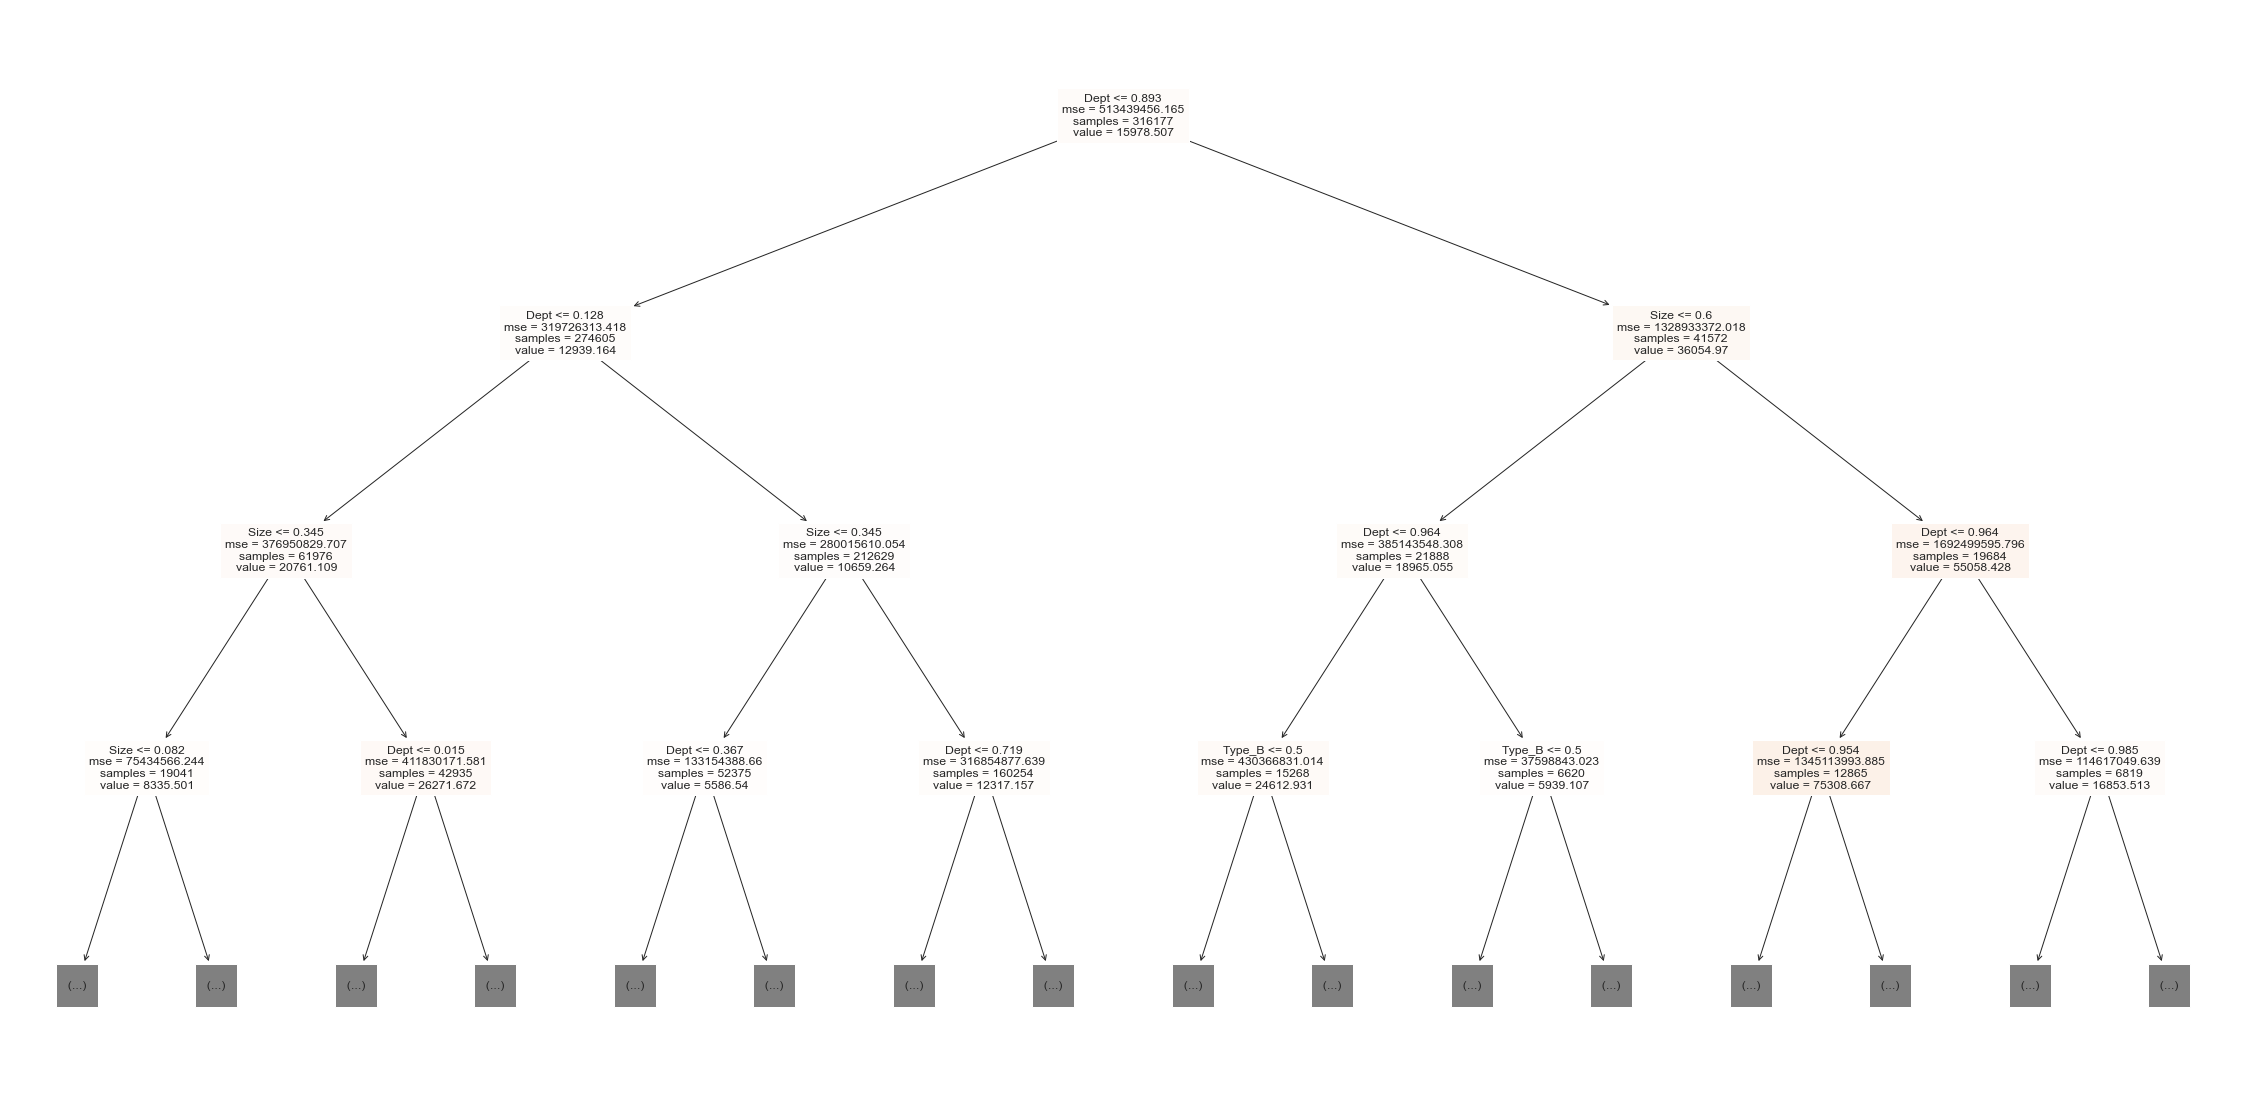

In [60]:
plt.figure(figsize=(40,20))
plot_tree(tree, feature_names=train_inputs.columns, max_depth=3, filled=True);

# Decision Tree Feature importance

In [61]:
tree_importances=tree.feature_importances_

In [62]:
tree_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree_importances
}).sort_values('importance', ascending=False)

In [63]:
tree_importance_df

,feature,importance
1,Dept,0.636039
2,Size,0.198802
0,Store,0.072103
10,Week,0.055737
12,Type_B,0.013551
5,MarkDown3,0.004337
9,Month,0.003614
8,Year,0.003393
6,MarkDown4,0.003347
11,Type_A,0.003196


# Random Forests

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
rf1 = RandomForestRegressor(random_state=0, n_estimators=10)


In [66]:
%%time
rf1.fit(train_inputs, train_targets)

Wall time: 17.8 s


RandomForestRegressor(n_estimators=10, random_state=0)

In [67]:
rf1_train_preds = rf1.predict(train_inputs)

In [68]:
rf1_train_rmse = mean_squared_error(train_targets, rf1_train_preds, squared=False)

In [69]:
rf1_val_preds = rf1.predict(val_inputs)

In [70]:
rf1_val_rmse = mean_squared_error(val_targets, rf1_val_preds, squared=False)

In [71]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf1_train_rmse, rf1_val_rmse))

Train RMSE: 1620.993367981347, Validation RMSE: 3997.6712441772224


# Hyperparameter Tuning

In [72]:
def test_params(**params):
    model = RandomForestRegressor(random_state=0, n_jobs=-1, n_estimators=16, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

In [74]:
test_params()

(1538.6031204571725, 3946.105075819126)

In [75]:
test_params(max_depth=10)

(7597.643155388232, 8145.895516784769)

The RMSE decreases with the max_depth parameter, so we will use the default value (none).



# Training the best Model

In [76]:
rf2 = RandomForestRegressor(n_estimators=16, random_state = 0, min_samples_leaf = 1)


In [77]:
# Train the model
rf2.fit(train_inputs, train_targets)


RandomForestRegressor(n_estimators=16, random_state=0)

In [78]:
# Now we generate prediction for the final model
rf2_train_preds = rf2.predict(train_inputs)

In [79]:
rf2_train_rmse = mean_squared_error(train_targets, rf2_train_preds, squared=False)

In [81]:
rf2_val_preds = rf2.predict(val_inputs)

In [82]:
rf2_val_rmse = mean_squared_error(val_targets, rf2_val_preds, squared=False)

In [83]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf2_train_rmse, rf2_val_rmse))

Train RMSE: 1538.6031204571725, Validation RMSE: 3946.105075819126


# Randome forest feature importance

In [84]:
rf2_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': rf2.feature_importances_
}).sort_values('importance', ascending=False)

In [85]:
rf2_importance_df

,feature,importance
1,Dept,0.627801
2,Size,0.205967
0,Store,0.073425
10,Week,0.050421
12,Type_B,0.011083
5,MarkDown3,0.007831
9,Month,0.007729
8,Year,0.003370
11,Type_A,0.002985
6,MarkDown4,0.002700


# Making Predictions on Test Set

In [86]:
test_dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = test_dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
test_dataset['Year'] = pd.to_datetime(test_dataset['Date']).dt.year
test_dataset['Month'] = pd.to_datetime(test_dataset['Date']).dt.month
test_dataset['Week'] = pd.to_datetime(test_dataset['Date']).dt.isocalendar().week
test_dataset = test_dataset.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment', 'Temperature'])

In [87]:
test_dataset

,Store,Dept,IsHoliday,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Year,Month,Week
0,1,1,False,A,151315,6766.44,5147.70,50.82,3639.90,2737.42,2012,11,44
1,1,1,False,A,151315,11421.32,3370.89,40.28,4646.79,6154.16,2012,11,45
2,1,1,False,A,151315,9696.28,292.10,103.78,1133.15,6612.69,2012,11,46
3,1,1,True,A,151315,883.59,4.17,74910.32,209.91,303.32,2012,11,47
4,1,1,False,A,151315,2460.03,0.00,3838.35,150.57,6966.34,2012,11,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,False,B,118221,4842.29,975.03,3.00,2449.97,3169.69,2013,6,26
115060,45,98,False,B,118221,9090.48,2268.58,582.74,5797.47,1514.93,2013,7,27
115061,45,98,False,B,118221,3789.94,1827.31,85.72,744.84,2150.36,2013,7,28
115062,45,98,False,B,118221,2961.49,1047.07,204.19,363.00,1059.46,2013,7,29


In [88]:
test_dataset

,Store,Dept,IsHoliday,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Year,Month,Week
0,1,1,False,A,151315,6766.44,5147.70,50.82,3639.90,2737.42,2012,11,44
1,1,1,False,A,151315,11421.32,3370.89,40.28,4646.79,6154.16,2012,11,45
2,1,1,False,A,151315,9696.28,292.10,103.78,1133.15,6612.69,2012,11,46
3,1,1,True,A,151315,883.59,4.17,74910.32,209.91,303.32,2012,11,47
4,1,1,False,A,151315,2460.03,0.00,3838.35,150.57,6966.34,2012,11,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,False,B,118221,4842.29,975.03,3.00,2449.97,3169.69,2013,6,26
115060,45,98,False,B,118221,9090.48,2268.58,582.74,5797.47,1514.93,2013,7,27
115061,45,98,False,B,118221,3789.94,1827.31,85.72,744.84,2150.36,2013,7,28
115062,45,98,False,B,118221,2961.49,1047.07,204.19,363.00,1059.46,2013,7,29


In [89]:
test_dataset[numeric_cols] = imputer.transform(test_dataset[numeric_cols])
test_dataset[numeric_cols] = scaler.transform(test_dataset[numeric_cols])
test_dataset[encoded_cols] = encoder.transform(test_dataset[categorical_cols])

In [90]:
test_inputs = test_dataset[numeric_cols + encoded_cols]

In [91]:
test_inputs

,Store,Dept,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Year,Month,Week,Type_A,Type_B,Type_C
0,1.0,1.0,151315.0,6766.44,5147.70,50.82,3639.90,2737.42,2012.0,11.0,44.0,1.0,0.0,0.0
1,1.0,1.0,151315.0,11421.32,3370.89,40.28,4646.79,6154.16,2012.0,11.0,45.0,1.0,0.0,0.0
2,1.0,1.0,151315.0,9696.28,292.10,103.78,1133.15,6612.69,2012.0,11.0,46.0,1.0,0.0,0.0
3,1.0,1.0,151315.0,883.59,4.17,74910.32,209.91,303.32,2012.0,11.0,47.0,1.0,0.0,0.0
4,1.0,1.0,151315.0,2460.03,0.00,3838.35,150.57,6966.34,2012.0,11.0,48.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45.0,98.0,118221.0,4842.29,975.03,3.00,2449.97,3169.69,2013.0,6.0,26.0,0.0,1.0,0.0
115060,45.0,98.0,118221.0,9090.48,2268.58,582.74,5797.47,1514.93,2013.0,7.0,27.0,0.0,1.0,0.0
115061,45.0,98.0,118221.0,3789.94,1827.31,85.72,744.84,2150.36,2013.0,7.0,28.0,0.0,1.0,0.0
115062,45.0,98.0,118221.0,2961.49,1047.07,204.19,363.00,1059.46,2013.0,7.0,29.0,0.0,1.0,0.0


In [94]:
test_preds=rf2.predict(test_inputs)

In [95]:
submission_df['Weekly_Sales']=test_preds

In [101]:
test_preds

array([10291.875, 10291.875, 10291.875, ..., 10291.875, 10291.875,
       10291.875])

# Making Predictions on Single Inputs


In [102]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols].values)
    return model.predict(input_df[numeric_cols + encoded_cols])[0]

In [103]:
sample_input = {'Store':9, 'Dept':72, 'IsHoliday':True, 'Type':'B', 'Size':125833, 'MarkDown1':2.5, 'MarkDown2':0.02, 
                'MarkDown3':55952.99, 'MarkDown4':14.64, 'MarkDown5':310.72, 'Year':2012, 'Month':11, 'Week':47}

In [104]:
predicted_price = predict_input(rf2, sample_input)

In [105]:
print('The predicted weekly sales is ${}'.format(predicted_price))

The predicted weekly sales is $10291.875
